1. Iris data set

In [2]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.info())               # pandas의 DataFrame 구조 확인
print(iris.describe())           # pandas의 통계량 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [3]:
# 그룹별 기술통계량 산출 (Petal Length 기준)
petal_stats = iris.groupby('species')['petal_length'].describe()
print(petal_stats)

# 그룹별 데이터 개수 확인
species_counts = iris['species'].value_counts()
print("\n[Species별 데이터 개수]")
print(species_counts)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

[Species별 데이터 개수]
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


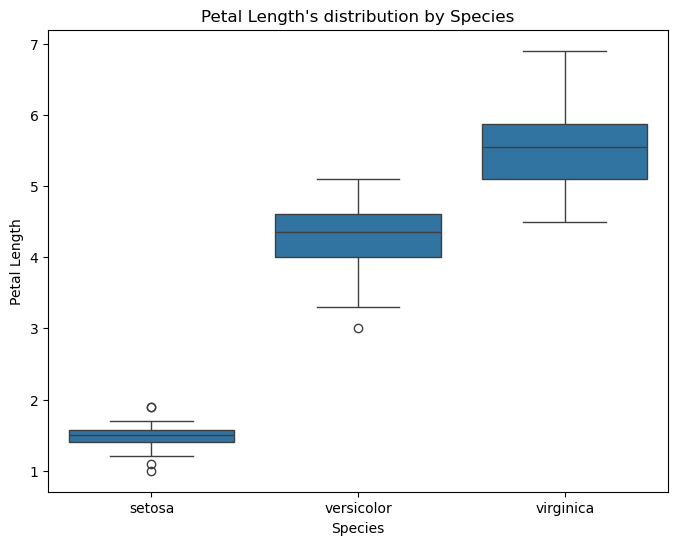

In [5]:
import matplotlib.pyplot as plt

# Boxplot 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_length', data=iris)

# 그래프 제목과 축 레이블 설정
plt.title('Petal Length\'s distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.show()

- Setosa: Petal Length가 가장 짧음, 분포 범위가 좁음, 이상치가 일부 존재
- Versicolor: 분포 범위가 비교적 넓음, 이상치 일부 존재
- Virginica: Peral Length가 가장 긺, 분포 범위가 넓음, 이상치 없음

- 세 종의 IQR과 중앙값을 보았을 때 종 간 Petal Length에 명확한 차이가 있는 것으로 보임.

In [11]:
from scipy.stats import shapiro

# Species 목록
species_list = iris['species'].unique()

# 정규성 검정
print("Shapiro-Wilk 정규성 검정 결과 (Species별 Petal Length)")
for species in species_list:
    data = iris[iris['species'] == species]['petal_length']
    stat, p = shapiro(data)
    print(f"{species}: W={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk 정규성 검정 결과 (Species별 Petal Length)
setosa: W=0.9550, p-value=0.0548
versicolor: W=0.9660, p-value=0.1585
virginica: W=0.9622, p-value=0.1098


In [12]:
from scipy.stats import levene

# 그룹별 데이터 추출
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

# Levene 등분산성 검정
stat, p = levene(setosa, versicolor, virginica)
print("Levene 등분산성 검정 결과")
print(f"Statistic={stat:.4f}, p-value={p:.2e}")

Levene 등분산성 검정 결과
Statistic=19.4803, p-value=3.13e-08


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 선형모형 적합
model = ols('petal_length ~ species', data=iris).fit()

# ANOVA 표 생성
anova_table = anova_lm(model, typ=2)
print("ANOVA 결과")
print(anova_table)

ANOVA 결과
            sum_sq     df            F        PR(>F)
species   437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정 수행
tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


====신용 카드=====

In [20]:
df = pd.read_csv("../../creditcard/creditcard.csv")

# 데이터의 상위 5개 확인
print(df.head())

# 전체 구조 및 결측치 확인
print(df.info())

# 기본 통계 요약
print(df.describe())

# Class 컬럼 비율 확인
print("\n[Class 분포]")
print(df['Class'].value_counts())
print("\n[Class 비율 (%)]")
print(df['Class'].value_counts(normalize=True) * 100)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [21]:
# 사기 거래만 추출
fraud = df[df['Class'] == 1]

# 정상 거래 중 10,000건 샘플링
normal_sampled = df[df['Class'] == 0].sample(n=10000, random_state=42)

# 두 데이터프레임 합치기
sampled_df = pd.concat([fraud, normal_sampled], axis=0)

# Class 비율 다시 확인
print("[샘플링 후 Class 분포]")
print(sampled_df['Class'].value_counts())
print("\n[Class 비율 (%)]")
print(sampled_df['Class'].value_counts(normalize=True) * 100)

[샘플링 후 Class 분포]
Class
0    10000
1      492
Name: count, dtype: int64

[Class 비율 (%)]
Class
0    95.310713
1     4.689287
Name: proportion, dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

# Amount 변수 표준화
scaler = StandardScaler()
sampled_df['Amount_Scaled'] = scaler.fit_transform(sampled_df[['Amount']])

# 원본 Amount 삭제
sampled_df = sampled_df.drop(columns=['Amount'])

# X, y로 나누기
X = sampled_df.drop(columns=['Class'])  # 독립변수
y = sampled_df['Class']                 # 타겟변수

# 확인
print(X.head())
print(y.value_counts())

        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V20       V21       V22  \
541  -2.537387  1.391657 -2.770089  ...  0.126911  0.517232 -0.035049   
623   0.325574 -0.067794 -0.270953  ...  2.102339  0.661696  0.435477   
4920  0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391   
6108 -3.496197 -0.248778 -0.247768  ... -0.171608  0.573574  0.176968   
6329  1.713445 -0.496358 -1.282858  ...  0.009061 -0.379068 -0.704181   

           V23       V24       V25       V26       V27       V28  \
541  -0.465211  0.320198  0.044519  

In [23]:
from sklearn.model_selection import train_test_split

# 학습셋:테스트셋 분할 (8:2), stratify로 비율 유지
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 비율 확인
print("[Train Class 분포]")
print(y_train.value_counts())
print("\n[Test Class 분포]")
print(y_test.value_counts())

print("\n[Train Class 비율 (%)]")
print(y_train.value_counts(normalize=True) * 100)

print("\n[Test Class 비율 (%)]")
print(y_test.value_counts(normalize=True) * 100)

[Train Class 분포]
Class
0    7999
1     394
Name: count, dtype: int64

[Test Class 분포]
Class
0    2001
1      98
Name: count, dtype: int64

[Train Class 비율 (%)]
Class
0    95.305612
1     4.694388
Name: proportion, dtype: float64

[Test Class 비율 (%)]
Class
0    95.33111
1     4.66889
Name: proportion, dtype: float64


In [24]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 오버샘플링 적용
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 결과 확인
print("[SMOTE 적용 후 Class 분포]")
print(y_train_res.value_counts())

[SMOTE 적용 후 Class 분포]
Class
0    7999
1    7999
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

# 모델 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# 예측
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Class 1 확률

# 평가
print("[Classification Report]")
print(classification_report(y_test, y_pred))

# PR-AUC
pr_auc = average_precision_score(y_test, y_proba)
print(f"\n[PR-AUC] {pr_auc:.4f}")


[Classification Report]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099


[PR-AUC] 0.9537
